In [1]:
"""
From chapter 6 in 'Apprentissage prodond avec python' from François CHOLLET
"""

"\nFrom chapter 6 in 'Apprentissage prodond avec python' from François CHOLLET\n"

In [1]:
import keras
from keras import layers
from keras.models import Sequential
from keras.datasets import imdb
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
physical_devices = tf.config.list_physical_devices('GPU')
gpu = physical_devices[0]
gpu

PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')

# Data processing

In [3]:
max_feature = 10_000
maxlen = 500
batch_size = 32

In [4]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_feature)
x_train.shape, x_test.shape, np.unique(y_train)

((25000,), (25000,), array([0, 1], dtype=int64))

In [5]:
x_train = tf.keras.utils.pad_sequences(x_train, maxlen=maxlen)
x_test = tf.keras.utils.pad_sequences(x_test, maxlen=maxlen)
x_train.shape, x_test.shape

((25000, 500), (25000, 500))

# Model

In [6]:
model = Sequential()
model.add(layers.Embedding(max_feature, 32))
model.add(layers.SimpleRNN(32))
model.add(layers.Dense(1, activation='sigmoid'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          320000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                2080      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(
    loss='binary_crossentropy',
    optimizer='rmsprop',
    metrics=['acc']
)

In [9]:
history = model.fit(
    x_train, 
    y_train,
    epochs=10,
    batch_size=10,
    validation_split=0.2
)

Epoch 1/10
2000/2000 [==============================] - 956s 477ms/step - loss: 0.5562 - acc: 0.6973 - val_loss: 0.4483 - val_acc: 0.7952
Epoch 2/10
2000/2000 [==============================] - 982s 491ms/step - loss: 0.3635 - acc: 0.8493 - val_loss: 0.5242 - val_acc: 0.7882
Epoch 3/10
2000/2000 [==============================] - 981s 491ms/step - loss: 0.3208 - acc: 0.8689 - val_loss: 0.3752 - val_acc: 0.8478
Epoch 4/10
2000/2000 [==============================] - 973s 486ms/step - loss: 0.3260 - acc: 0.8648 - val_loss: 0.3858 - val_acc: 0.8470
Epoch 5/10
2000/2000 [==============================] - 946s 473ms/step - loss: 0.3488 - acc: 0.8534 - val_loss: 0.4575 - val_acc: 0.7992
Epoch 6/10
2000/2000 [==============================] - 942s 471ms/step - loss: 0.3341 - acc: 0.8619 - val_loss: 0.4397 - val_acc: 0.8076
Epoch 7/10
2000/2000 [==============================] - 897s 448ms/step - loss: 0.3030 - acc: 0.8764 - val_loss: 0.4376 - val_acc: 0.7948
Epoch 8/10
2000/2000 [============

# Display performances curves

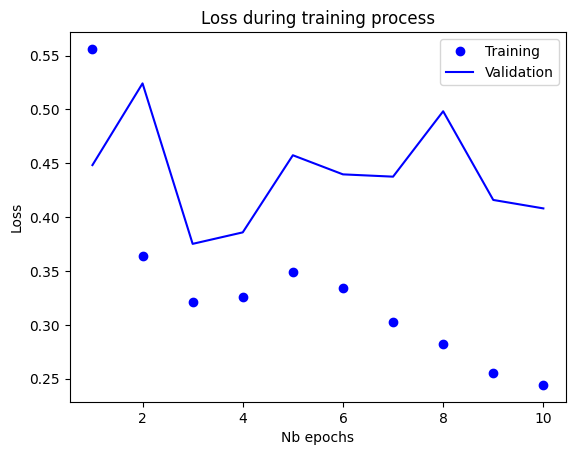

In [11]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, 11)

plt.plot(epochs, loss_values, 'bo', label="Training")
plt.plot(epochs, val_loss_values, 'b', label="Validation")

plt.title("Loss during training process")
plt.xlabel("Nb epochs")
plt.ylabel("Loss")
plt.legend()

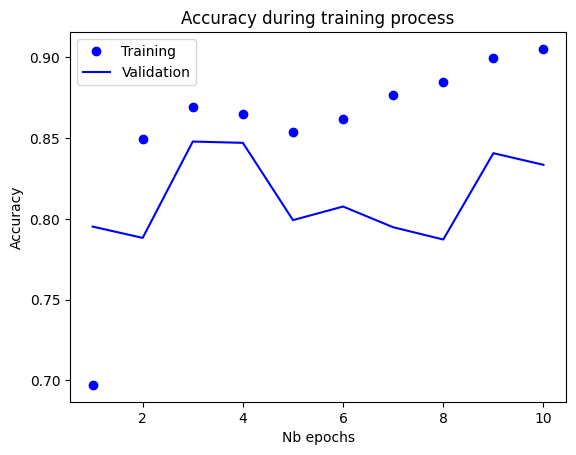

In [12]:
history_dict = history.history
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

epochs = range(1, 11)

plt.plot(epochs, acc_values, 'bo', label="Training")
plt.plot(epochs, val_acc_values, 'b', label="Validation")

plt.title("Accuracy during training process")
plt.xlabel("Nb epochs")
plt.ylabel("Accuracy")
plt.legend()